In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#datos = pd.read_csv('boston_housing.csv')

¿Existe una diferencia significativa en el valor mediano de las casas delimitadas por el río Charles o no?

¿Existe alguna diferencia en los valores medios de las casas de cada proporción de unidades ocupadas por sus propietarios construidas antes 
 de 1940?

¿Podemos concluir que no existe ninguna relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas 
 por ciudad?

¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas 
 por sus propietarios?

A continuación se describen las variables del conjunto de datos:

- CRIM - tasa de delincuencia per cápita por ciudad

- ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.

- INDUS - proporción de acres comerciales no minoristas por localidad.

- CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)

- NOX - concentración de óxidos nítricos (partes por 10 millones)

- RM - número medio de habitaciones por vivienda

- EDAD - proporción de unidades ocupadas por sus propietarios construidas antes de 1940

- DIS - distancias ponderadas a cinco centros de empleo de Boston

- RAD - índice de accesibilidad a las autopistas radiales

- IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares

- PTRATIO - proporción alumnos-profesor por ciudad

- LSTAT - % más bajo de la población

- MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [14]:
# Cargamos el data frame desde la URL
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
datos=pd.read_csv(boston_url)

In [11]:
#Consulta a al data frame
datos.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


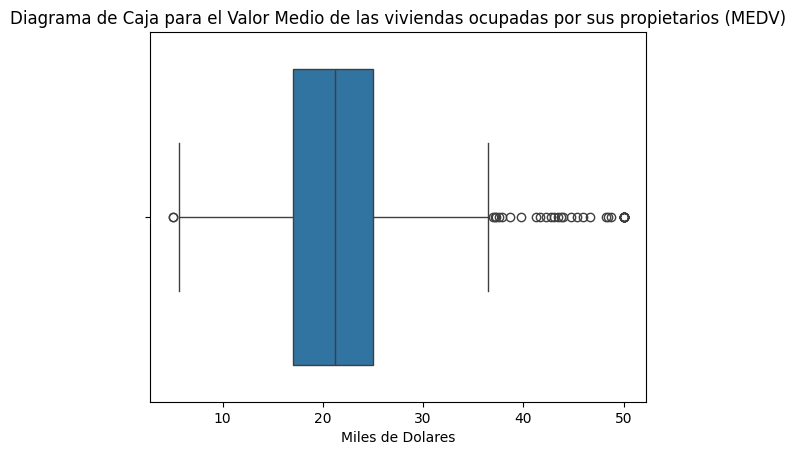

In [20]:
#Generamos el diagrama para conocer la distribucion de los valores de MEDV

ax = sns.boxplot(x='MEDV', data=datos)
plt.title ('Diagrama de Caja para el Valor Medio de las viviendas ocupadas por sus propietarios (MEDV)')
plt.xlabel('Miles de Dolares')
plt.show()

Conclusion: Como se puede apreciar en el diagrama de caja, existen muchos valores atipicos e incluso extremos para los valores del MEDV.

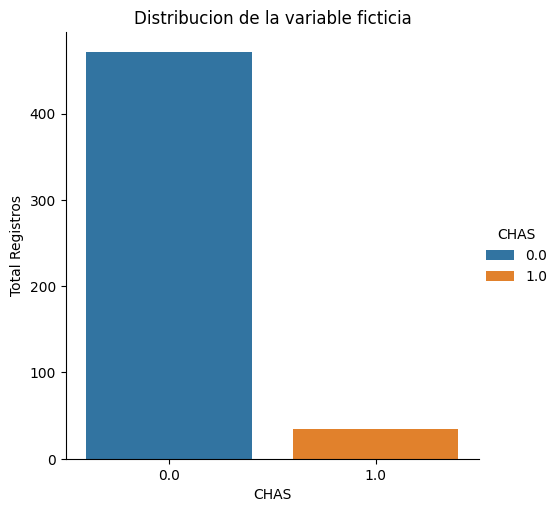

In [23]:
# Generamos el diagrama de barra para conocer la distribucion de los datos en base a la variable CHAS
ax = sns.catplot(x='CHAS', kind='count', data=datos, hue='CHAS')
plt.title('Distribucion de la variable ficticia')
plt.xlabel('CHAS')
plt.ylabel('Total Registros')
plt.show()

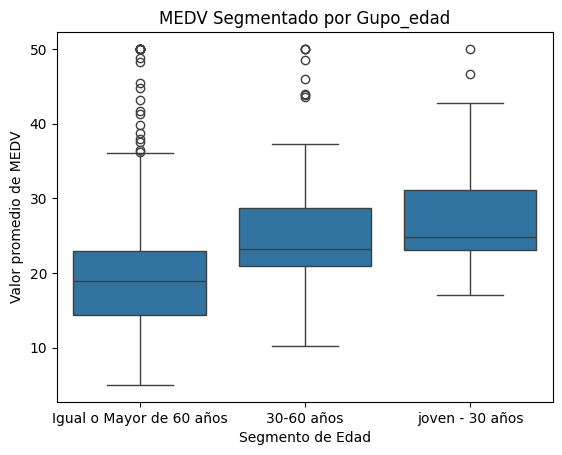

In [25]:
# Generamos el campo nuevo para medir distribuir los clientes por la variable EDAD

datos.loc[(datos['AGE'] <= 30), 'Grupo_edad'] = 'joven - 30 años'
datos.loc[(datos['AGE'] > 30) & (datos['AGE'] < 60), 'Grupo_edad'] = '30-60 años'
datos.loc[(datos['AGE'] >= 60), 'Grupo_edad'] = 'Igual o Mayor de 60 años'


ax = sns.boxplot(x='Grupo_edad', y='MEDV', data=datos)
plt.title('MEDV Segmentado por Gupo_edad')
plt.xlabel('Segmento de Edad')
plt.ylabel('Valor promedio de MEDV')
plt.show()

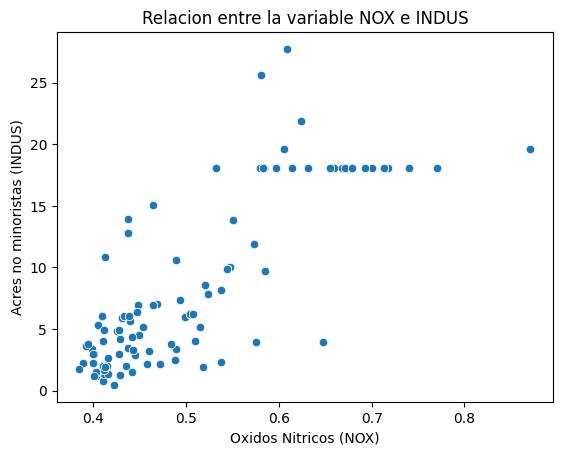

In [26]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=datos)
plt.title('Relacion entre la variable NOX e INDUS')
plt.xlabel('Oxidos Nitricos (NOX)')
plt.ylabel('Acres no minoristas (INDUS)')
plt.show()

In [29]:
#Generamos la proporcion de relacion entre las variables NOX e INDUS
scipy.stats.pearsonr(datos['NOX'], datos['INDUS'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

Se puede observar que los niveles de NOX incrementan a pesar de una estabilizacion de INDUS, lo que siguere una correlacion de causalidad y no linea debido al incremento de NOX.

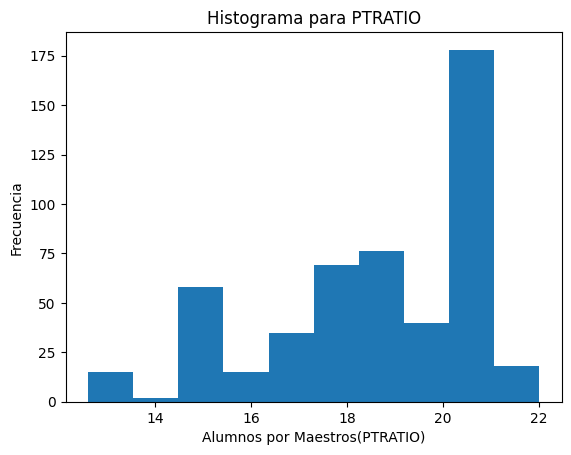

In [32]:
# Histograma para PTRATIO
plt.hist(datos['PTRATIO'])
plt.title("Histograma para PTRATIO")
plt.xlabel('Alumnos por Maestros(PTRATIO)')
plt.ylabel('Frecuencia')
plt.show()

Se oberva un sesgo a la izquierda por, lo que indica que el valor que mas se repite (moda) se encuentra en mayor frecuencia que el valor de la mediana y la media.

¿Existe una diferencia significativa en el valor mediano de las casas delimitadas por el río Charles o no?

Hipotesis Nula = No existe diferencia.
Hipotesis Alternativa = Existe una diferencia.

In [33]:
# Calculamos levene para identificar si la varianza es igual en ambas variables

scipy.stats.levene(datos[datos['CHAS'] == 0]['MEDV'], datos[datos['CHAS'] == 1]['MEDV'], center='mean')


# Debido a que no tenemos una valor p de 0.003 y es menor que 0.05 
# rechazamos la hipotesis nula y observamos que no existe una relacion entre las varianzas entre las MEDV de CHAS = 1 y CHAS = 0


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [34]:
#Calculamos levene para identificar la relacion de varianzas de los grupos en base a la mediana
scipy.stats.levene(datos[datos['CHAS'] == 0]['MEDV'], datos[datos['CHAS'] == 1]['MEDV'], center='median') 

#Como lo mencionamos anteriormente utilziamos la mediana como centro y es mayor que 0.05
# aceptamos la hipotesis nula


LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [36]:
# Hacemos una prueba t
scipy.stats.ttest_ind(datos[datos['CHAS'] == 0]['MEDV'], datos[datos['CHAS'] == 1]['MEDV'], equal_var=True) 

# Como el valor P es menor que 0.05 rechazaremos la hipotesis nula.
# La prueba t sugiere que hay una diferencia estadisticamente significativa entre las casas delimitadas por CHAR


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Rechazaremos la hipotesis nula  que sugiere que no existe una diferencia estadisticamente siginificativa entre el valor medio de las casas
delimitadas por CHAR.

¿Existe alguna diferencia en los valores medios de las casas de cada proporción de unidades ocupadas por sus propietarios construidas antes 
 de 1940?

Hipotesis nula= no hay diferencia en los valores medianos de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios 
construidas antes de 1940 (AGE).

Hipotesis Alternativa= hay una diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus 
propietarios construidas antes de 1940 (AGE).


In [48]:
treintaomenos = datos[datos['Grupo_edad'] == 'joven - 30 años']['MEDV']
treinta_sesenta = datos[datos['Grupo_edad'] == '30-60 años']['MEDV']
sesentaomas = datos[datos['Grupo_edad'] == 'Igual o Mayor de 60 años']['MEDV']

In [49]:
#Calcular levene para identificar igualdad en la varianza

scipy.stats.levene(treintaomenos, treinta_sesenta, sesentaomas, center='mean') 

# Como el valor P es mayor que 0.05 asumimos que existe igualdad entre las varianzas


LeveneResult(statistic=1.6885490844857323, pvalue=0.18583317003158115)

In [51]:
# Calcular ANOVA
scipy.stats.f_oneway(treintaomenos, treinta_sesenta, sesentaomas) 

#Como el valor P es menor que 0.05 rechazamos la hipotesis nula, que sugiere que no hay diferencia en la MEDV por el Grupo Edad

# since p-value is less than alpha value 0.05, we reject null hypothesis which suggests there is no statistically significant difference, but indeed it is there


F_onewayResult(statistic=28.022628828406628, pvalue=2.893582414484241e-12)

¿Podemos concluir que no existe ninguna relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas 
 por ciudad?

 Hipotesis nula= no existe relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad.

 Hipotesis Alternativa= existe una relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad.

In [52]:
# Pearson para medir correlacion entre las variables
scipy.stats.pearsonr(datos['NOX'], datos['INDUS'])

# Rechazamos la hipotesis nula ya que indica que no existe correlacion, y el valor p es menor que 0.05

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas 
 por sus propietarios?


 Hipotesis nula= La distancia ponderada a los cinco centros de empleo de Boston (DIS) no tiene impacto en el valor medio de las viviendas ocupadas por sus propietarios (MEDV).

 Hipotesis alternativa= La distancia ponderada a los cinco centros de empleo de Boston (DIS) tiene un impacto en el valor medio de las viviendas ocupadas por sus propietarios (MEDV).

In [53]:
# Regresion Lineal

X = datos['DIS']
Y = datos['MEDV']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

# Como P fue menor que 0.05 rechazamos la hipotesis nula lo que indica que no existe ninguna relacion entre DIS y MEDV.
# A su vez si existe una correlacion no es tan fuerte.

# La relacion la podemos expresar matematicamente como Y= 18.39 + 1.0916 X


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.21e-08
Time:                        01:07:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""